# Exploritary Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:

purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
colors = ["#311B62", "#513897", "#926DAA", "#D4A0D1", "#F0D2F0", "#F8F2E8"]

In [5]:
data = pd.read_csv('Iris.csv')

In [6]:
data.shape

(150, 6)

In [7]:
data.drop(columns=['Id'],inplace=True)

In [8]:
rename_col = {'SepalLengthCm':'Sepal_length','SepalWidthCm':'Sepal_width',
              'PetalLengthCm':'Petal_length','PetalWidthCm':'Petal_width'}
data = data.rename(columns=rename_col)

In [9]:
data = data.drop_duplicates()

In [10]:
if data.isnull().any().any():
    print('Null Values Present')
elif data.isna().any().any():
    print('NaN values Present')
elif data.duplicated().any():
    print('Duplicates Present')
else:
    print('Data set is clean')


Data set is clean


In [11]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
mapping = {
    'Iris-setosa':'Setosa',
    'Iris-versicolor':'Versicolor',
    'Iris-virginica':'Virginica'}
data['Species'] = data['Species'].map(mapping)

In [13]:
# Selecting Random feature variables to test during deployment phase
D_test = data.iloc[[47, 64, 104]]
print(D_test)
print('Before dropping',data.shape)

# Dropping the randomly picked rows from dataframe
# Modify the original DataFrame in-place
index_to_drop = [47, 64, 104]
data.drop(index_to_drop, inplace=True)
print('After dropping',data.shape)

     Sepal_length  Sepal_width  Petal_length  Petal_width     Species
49            5.0          3.3           1.4          0.2      Setosa
66            5.6          3.0           4.5          1.5  Versicolor
106           4.9          2.5           4.5          1.7   Virginica
Before dropping (147, 5)
After dropping (144, 5)


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal_length,144.0,5.862500,0.829093,4.3,5.1,5.8,6.400,7.9
Sepal_width,144.0,3.056250,0.441187,2.0,2.8,3.0,3.325,4.4
Petal_length,144.0,3.784028,1.758125,1.0,1.6,4.4,5.100,6.9
Petal_width,144.0,1.208333,0.756556,0.1,0.3,1.3,1.800,2.5


In [15]:
stats = data.describe()
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_df = stats.loc[['mean', 'range', '25%', '50%', '75%','max','min']]
new_df.rename({'50%': 'median'}, inplace=True)
new_df

,Sepal_length,Sepal_width,Petal_length,Petal_width
mean,5.8625,3.05625,3.784028,1.208333
range,3.6000,2.40000,5.900000,2.400000
25%,5.1000,2.80000,1.600000,0.300000
median,5.8000,3.00000,4.400000,1.300000
75%,6.4000,3.32500,5.100000,1.800000
max,7.9000,4.40000,6.900000,2.500000
min,4.3000,2.00000,1.000000,0.100000


Text(0.5, 1.0, 'Count Plot')

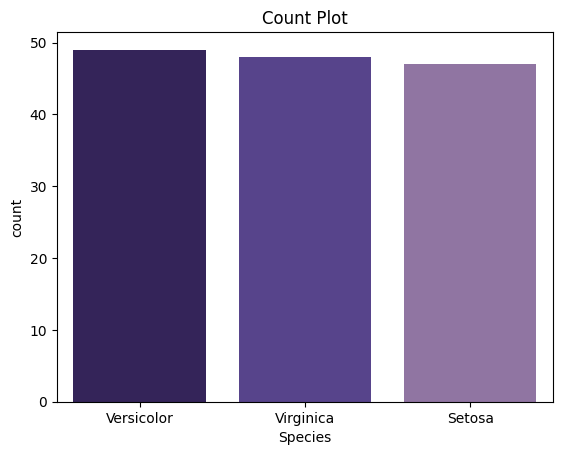

In [16]:
sns.barplot(data['Species'].value_counts(),palette=colors)
plt.title('Count Plot')

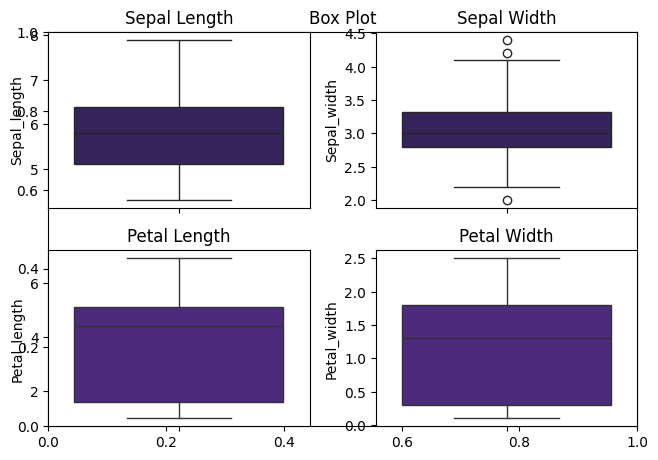

In [17]:
# Create a 2x2 grid of box plots
plt.figure(figsize=(7,5))
plt.title('Box Plot')

# Box plot for sepal_length
plt.subplot(2, 2, 1)
sns.boxplot(data['Sepal_length'],palette=colors)
plt.title('Sepal Length')

# Box plot for sepal_width
plt.subplot(2, 2, 2)
sns.boxplot(data['Sepal_width'],palette=colors)
plt.title('Sepal Width')

# Box plot for petal_length
plt.subplot(2, 2, 3)
sns.boxplot(data['Petal_length'],palette=purple_grad)
plt.title('Petal Length')

# Box plot for petal_width
plt.subplot(2, 2, 4)
sns.boxplot(data['Petal_width'],palette=purple_grad)
plt.title('Petal Width')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

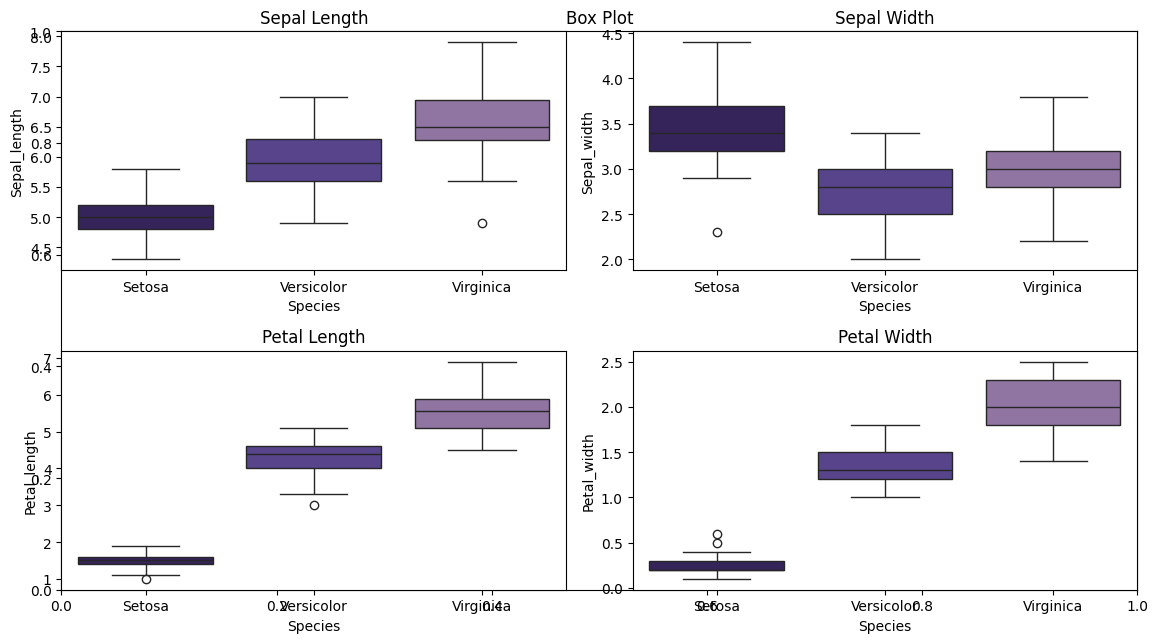

In [18]:
# Create a 2x2 grid of box plots
plt.figure(figsize=(12,7))
plt.title('Box Plot')

# Box plot for sepal_length
plt.subplot(2, 2, 1)
sns.boxplot(x='Species',y='Sepal_length',data=data,palette=colors)
plt.title('Sepal Length')

# Box plot for sepal_width
plt.subplot(2, 2, 2)
sns.boxplot(x='Species',y='Sepal_width',data=data,palette=colors)
plt.title('Sepal Width')

# Box plot for petal_length
plt.subplot(2, 2, 3)
sns.boxplot(x='Species',y='Petal_length',data=data,palette=colors)
plt.title('Petal Length')

# Box plot for petal_width
plt.subplot(2, 2, 4)
sns.boxplot(x='Species',y='Petal_width',data=data,palette=colors)
plt.title('Petal Width')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

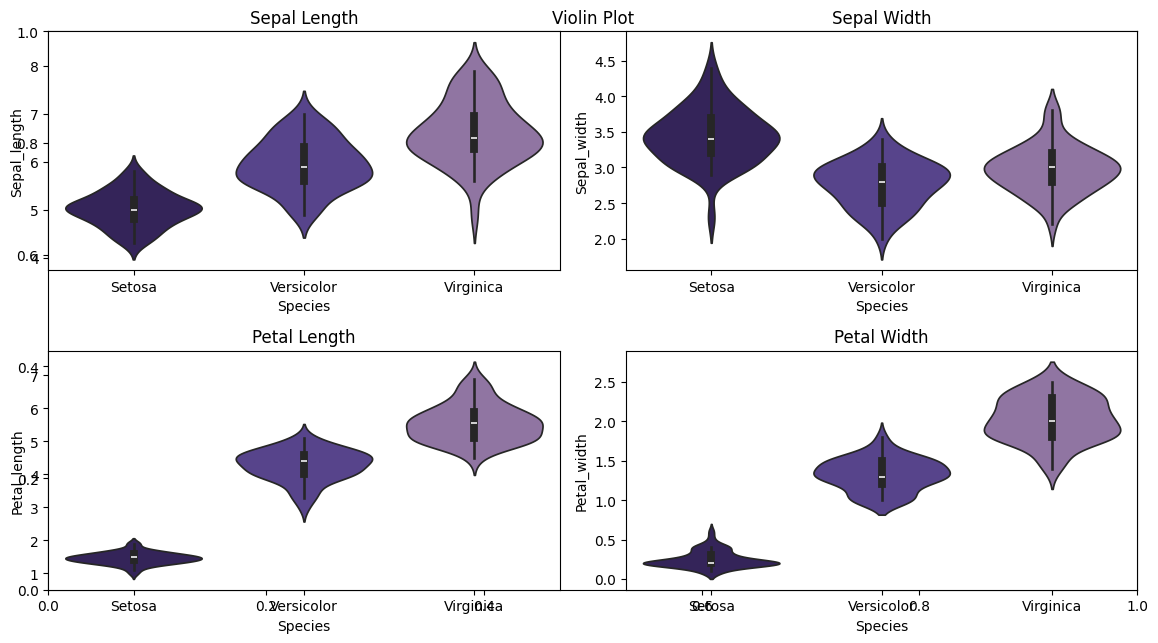

In [19]:
# Create a 2x2 grid of box plots
plt.figure(figsize=(12,7))
plt.title('Violin Plot')

# Box plot for sepal_length
plt.subplot(2, 2, 1)
sns.violinplot(x='Species',y='Sepal_length',data=data,palette=colors)
plt.title('Sepal Length')

# Box plot for sepal_width
plt.subplot(2, 2, 2)
sns.violinplot(x='Species',y='Sepal_width',data=data,palette=colors)
plt.title('Sepal Width')

# Box plot for petal_length
plt.subplot(2, 2, 3)
sns.violinplot(x='Species',y='Petal_length',data=data,palette=colors)
plt.title('Petal Length')

# Box plot for petal_width
plt.subplot(2, 2, 4)
sns.violinplot(x='Species',y='Petal_width',data=data,palette=colors)
plt.title('Petal Width')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

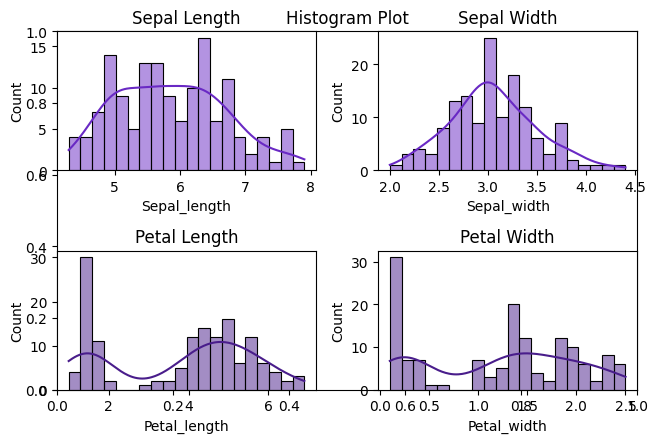

In [20]:
# Create a 2x2 grid of box plots
plt.figure(figsize=(7,5))
plt.title('Histogram Plot')


# Box plot for sepal_length
plt.subplot(2, 2, 1)
sns.histplot(data['Sepal_length'],color=purple_grad[1],kde=True,bins=20)
plt.title('Sepal Length')

# Box plot for sepal_width
plt.subplot(2, 2, 2)
sns.histplot(data['Sepal_width'],color=purple_grad[1],kde=True,bins=20)
plt.title('Sepal Width')

# Box plot for petal_length
plt.subplot(2, 2, 3)
sns.histplot(data['Petal_length'],color=purple_grad[0],kde=True,bins=20)
plt.title('Petal Length')

# Box plot for petal_width
plt.subplot(2, 2, 4)
sns.histplot(data['Petal_width'],color=purple_grad[0],kde=True,bins=20)
plt.title('Petal Width')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

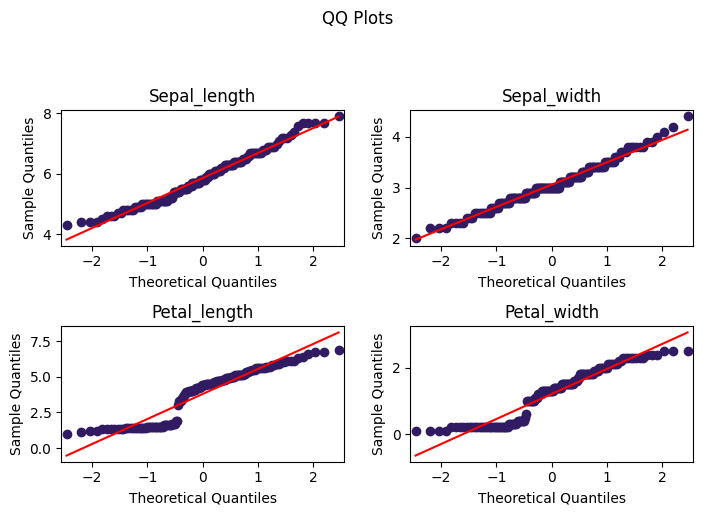

In [21]:
import statsmodels.api as sm


# Create a 2x2 grid of subplots for QQ plots
fig, axes = plt.subplots(2, 2, figsize=(7, 5))
fig.suptitle('QQ Plots', y=1.02)

# Iterate over columns and plot QQ plots
columns = data.columns[:-1]
for i, column in enumerate(columns):
    row, col = divmod(i, 2)
    sm.qqplot(data[column], line='s', ax=axes[row, col],
               markerfacecolor=colors[0],markeredgecolor=colors[0])
    axes[row, col].set_title(column)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [22]:
data['Species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [23]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

<Figure size 500x500 with 0 Axes>

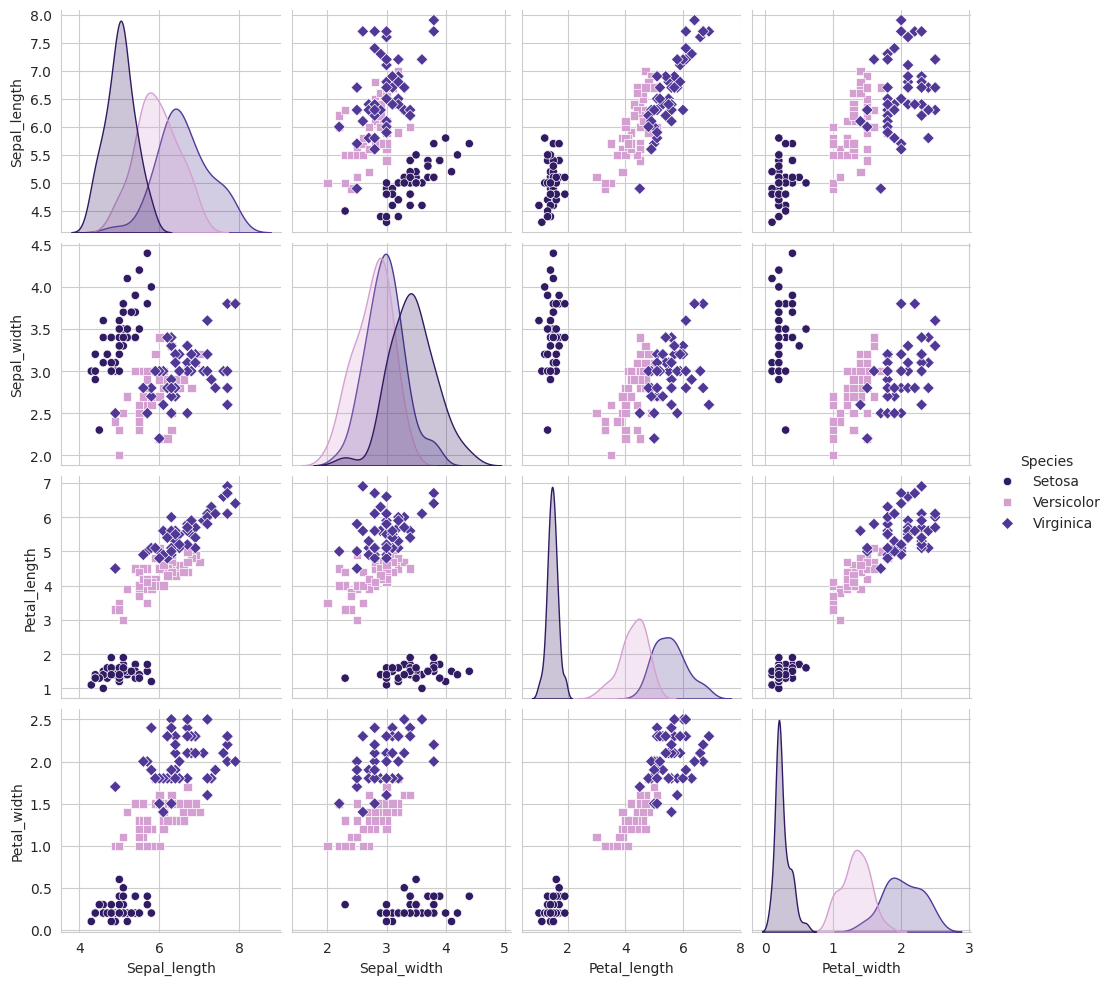

In [24]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
cols = data.columns[:-1]
pairplot = sns.pairplot(data, hue = 'Species', palette = ['#311B62','#D4A0D1','#513897'],
                         markers = ['o', 's', 'D'], vars = cols)
plt.show()

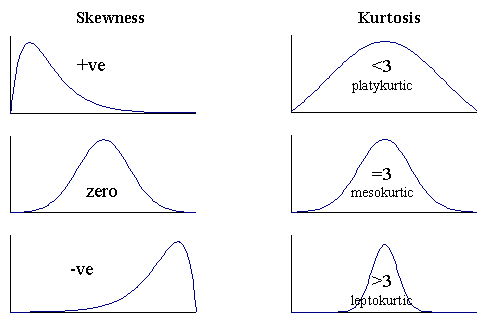

In [25]:
import scipy.stats as st
data.groupby('Species').agg([st.skew,st.kurtosis,np.mean]) 

Sepal_length                     Sepal_width                      \
                   skew  kurtosis      mean        skew  kurtosis      mean   
Species                                                                       
Setosa         0.040329 -0.388166  5.019149   -0.007788  0.702719  3.436170   
Versicolor     0.068188 -0.613203  5.942857   -0.326256 -0.493424  2.767347   
Virginica      0.071625 -0.076876  6.606250    0.320470  0.450738  2.979167   

           Petal_length                     Petal_width                      
                   skew  kurtosis      mean        skew  kurtosis      mean  
Species                                                                      
Setosa         0.071551  0.617410  1.463830    1.187495  1.285868  0.251064  
Versicolor    -0.647683  0.102326  4.273469   -0.037953 -0.535944  1.326531  
Virginica      0.522813 -0.296117  5.556250   -0.117733 -0.703697  2.025000

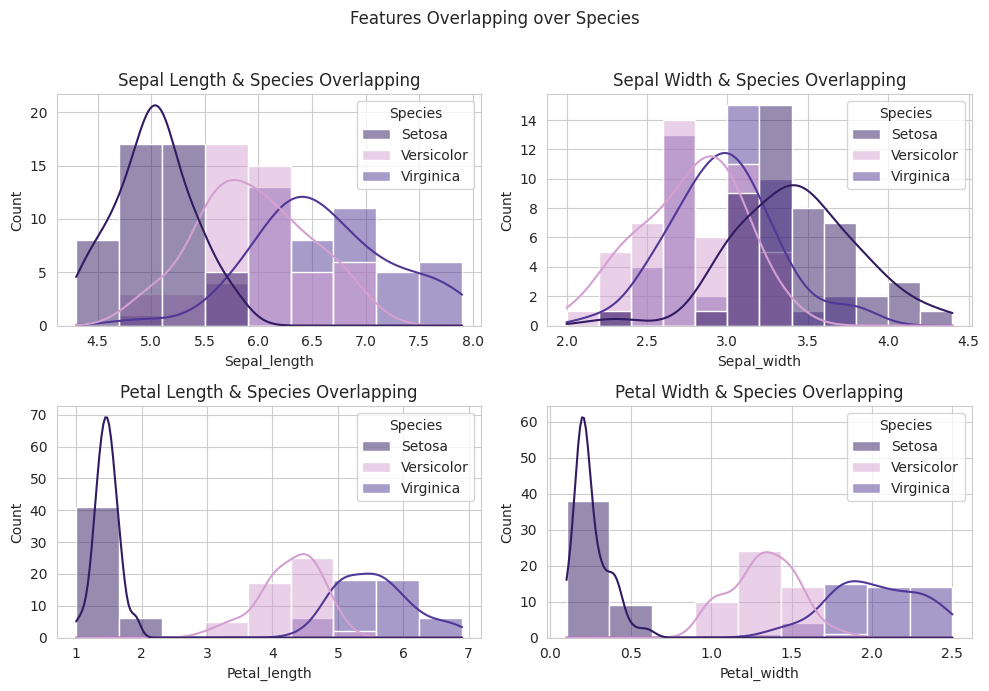

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of box plots
plt.figure(figsize=(10,7))
plt.suptitle('Features Overlapping over Species')

# Box plot for sepal_length
plt.subplot(2, 2, 1)
sns.histplot(data, x="Sepal_length", hue="Species", palette=['#311B62', '#D4A0D1', '#513897'],kde=True)
plt.title('Sepal Length & Species Overlapping')


# Box plot for sepal_width
plt.subplot(2, 2, 2)
sns.histplot(data, x="Sepal_width", hue="Species", palette=['#311B62', '#D4A0D1', '#513897'],kde=True)
plt.title('Sepal Width & Species Overlapping')


# Box plot for petal_length
plt.subplot(2, 2, 3)
sns.histplot(data, x="Petal_length", hue="Species", palette=['#311B62', '#D4A0D1', '#513897'],kde=True)
plt.title('Petal Length & Species Overlapping')


# Box plot for petal_width
plt.subplot(2, 2, 4)
sns.histplot(data, x="Petal_width", hue="Species", palette=['#311B62', '#D4A0D1', '#513897'],kde=True)
plt.title('Petal Width & Species Overlapping')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add some space for the suptitle

# Show the plot
plt.show()


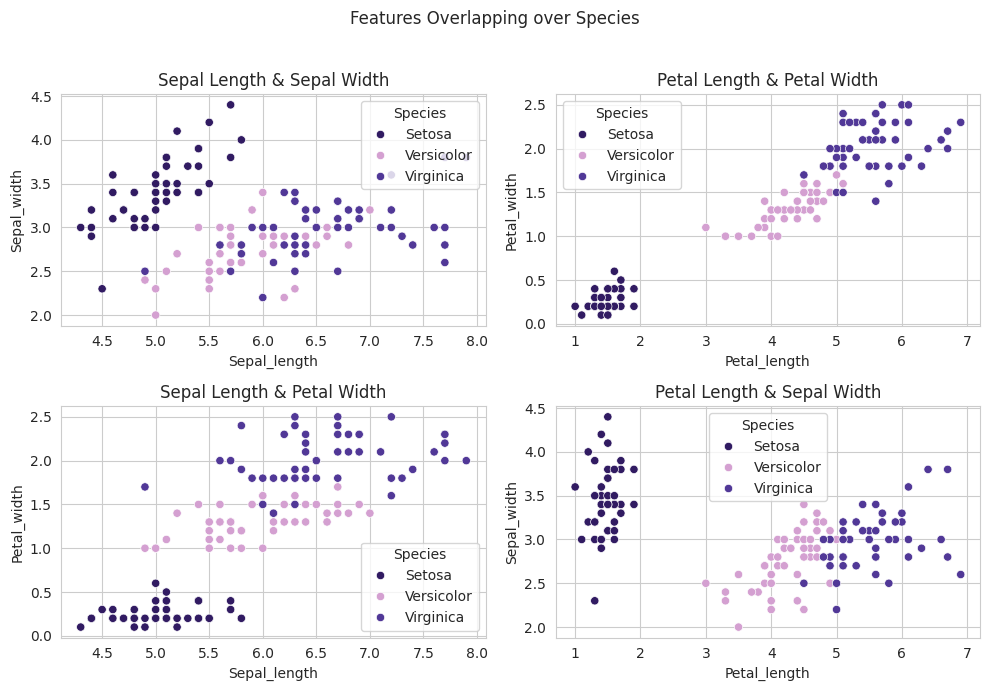

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of box plots
plt.figure(figsize=(10,7))
plt.suptitle('Features Overlapping over Species')

# Box plot for sepal_length
plt.subplot(2, 2, 1)
sns.scatterplot(data, x="Sepal_length", y= 'Sepal_width',hue="Species", palette=['#311B62', '#D4A0D1', '#513897'])
plt.title('Sepal Length & Sepal Width')


# Box plot for sepal_width
plt.subplot(2, 2, 2)
sns.scatterplot(data, x="Petal_length",y = 'Petal_width', hue="Species", palette=['#311B62', '#D4A0D1', '#513897'])
plt.title('Petal Length & Petal Width')


# Box plot for petal_length
plt.subplot(2, 2, 3)
sns.scatterplot(data, x="Sepal_length",y = 'Petal_width', hue="Species", palette=['#311B62', '#D4A0D1', '#513897'])
plt.title('Sepal Length & Petal Width')


# Box plot for petal_width
plt.subplot(2, 2, 4)
sns.scatterplot(data, x="Petal_length",y = 'Sepal_width', hue="Species", palette=['#311B62', '#D4A0D1', '#513897'])
plt.title('Petal Length & Sepal Width')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add some space for the suptitle

# Show the plot
plt.show()

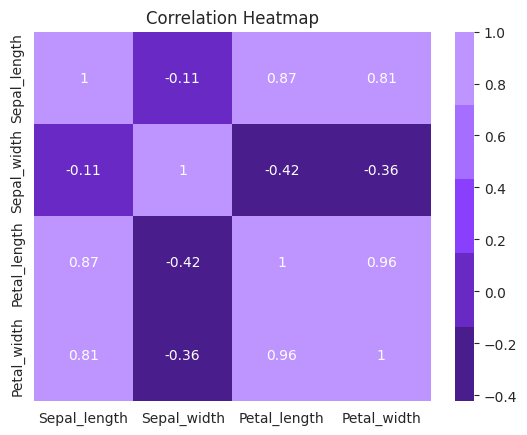

In [28]:
sns.heatmap(data[data.describe().columns].corr(),annot=True,cmap=purple_grad)
plt.title('Correlation Heatmap')
plt.show()